In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_list_model_update(df):
    list_update = []
    best = df[0]
    for i in range(len(df)):
        if df[i] > best:
            best = df[i]
            list_update.append(i)
    return set(list_update)

def get_strat_3(df):
    temp = []
    for i in range(len(df)):
        if (i + 1) % 4 == 0:
            temp.append(i)
    return set(temp)

{11}


e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


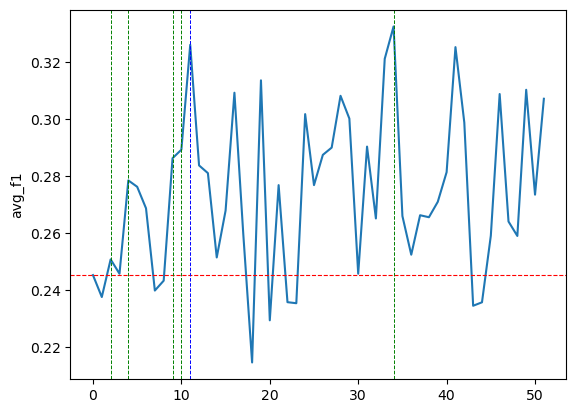

In [26]:
df = pd.read_csv(r"E:\Learning\Docker_basic\basic_kafka\kltn\experiments\results\1\strat2\task2_distil_cnn_20_80_1epoch_s2_evaldev.csv")
baseline_f1 = 0.24528326850308274
list_model_update = get_list_model_update(list(df['avg_f1']))
strat3_trigger = get_strat_3(df)
strat_3_update = strat3_trigger.intersection(list_model_update) 
print(strat_3_update)
try:
    list_model_update -= strat_3_update
    strat3_trigger -= strat_3_update
except:
    pass

sns.lineplot(df['avg_f1'])

plt.axhline(y=baseline_f1, color='r', linestyle='--', linewidth=0.8)

for val in list_model_update:
    plt.axvline(x= val, color='g', linestyle= '--', linewidth=0.7)

# for val in strat3_trigger:
#     plt.axvline(x= val, color='y', linestyle= '--', linewidth=0.7)

try:
    for val in strat_3_update:
        plt.axvline(x= val, color='b', linestyle= '--', linewidth=0.7)
except:
    pass

In [25]:
df = pd.read_csv(r"E:\Learning\Docker_basic\basic_kafka\kltn\experiments\results\1\strat1\task2_distil_cnn_20_80_1epoch_s1_evaldev.csv")
baseline_f1 = 0.24528326850308274
list_model_update = get_list_model_update(list(df['avg_f1']))


sns.lineplot(df['avg_f1'])

plt.axhline(y=baseline_f1, color='r', linestyle='--', linewidth=0.8)

for val in list_model_update:
    plt.axvline(x= val, color='g', linestyle= '--', linewidth=0.7)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Learning\\Docker_basic\\basic_kafka\\kltn\\experiments\\results\\1\\strat1\\task2_distil_cnn_20_80_1epoch_s1_evaldev.csv'

In [21]:
from python_mermaid.diagram import MermaidDiagram, Node, Link

# Tạo các node
input_node = Node("Input")
pretrained_model_node = Node("Pretrained Model<br>(e.g., DistilBERT/BERT)")
lstm1_node = Node("LSTM1<br>(hidden_size=128,<br>num_layers=1)")
lstm2_node = Node("LSTM2<br>(hidden_size=128,<br>num_layers=1)")
fc1_node = Node("Fully Connected Layer 1<br>(512 neurons)")
dropout1_node = Node("Dropout<br>(0.4)")
fc2_node = Node("Fully Connected Layer 2<br>(256 neurons)")
dropout2_node = Node("Dropout<br>(0.4)")
fc3_node = Node("Fully Connected Layer 3<br>(num_classes neurons)")
log_softmax_node = Node("Log Softmax")
output_node = Node("Output")

# Tạo các links
links = [
    Link(input_node, pretrained_model_node),
    Link(pretrained_model_node, lstm1_node),
    Link(lstm1_node, lstm2_node),
    Link(lstm2_node, fc1_node),
    Link(fc1_node, dropout1_node),
    Link(dropout1_node, fc2_node),
    Link(fc2_node, dropout2_node),
    Link(dropout2_node, fc3_node),
    Link(fc3_node, log_softmax_node),
    Link(log_softmax_node, output_node)
]

# Tạo sơ đồ
diagram = MermaidDiagram(
    title="LSTM Model",
    nodes=[
        input_node,
        pretrained_model_node,
        lstm1_node,
        lstm2_node,
        fc1_node,
        dropout1_node,
        fc2_node,
        dropout2_node,
        fc3_node,
        log_softmax_node,
        output_node
    ],
    links=links
)

diagram